In [1]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
smt = SMOTETomek(random_state= 42)

In [2]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold, validation_curve, learning_curve, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter(action = 'ignore')


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os


excel_path = r"C:\Users\arrkr\OneDrive\Desktop\ai &ml projects\E Commerce Dataset 33.xlsx"
df = pd.read_excel(excel_path, sheet_name="E Comm")  


df.columns = df.columns.str.strip()


cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
            'Gender', 'MaritalStatus', 'PreferedOrderCat']


df_encoded = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


output_folder = r"C:\Users\arrkr\OneDrive\Desktop\ai &ml projects"
os.makedirs(output_folder, exist_ok=True)


output_path = os.path.join(output_folder, "df_encoded_churn.csv")
df_encoded.to_csv(output_path, index=False)

print("✅ Encoding done. CSV saved at:", output_path)
print(df_encoded.head())


✅ Encoding done. CSV saved at: C:\Users\arrkr\OneDrive\Desktop\ai &ml projects\df_encoded_churn.csv
   CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0                     1         2              6.0   
1       50002      1     NaN                     2         0              8.0   
2       50003      1     NaN                     2         0             30.0   
3       50004      1     0.0                     2         2             15.0   
4       50005      1     0.0                     2         0             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0     

In [6]:
df_encoded = pd.read_csv(r"C:\Users\arrkr\OneDrive\Desktop\ai &ml projects\df_encoded_churn.csv")


In [7]:
df_encoded 

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,2,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,2,0,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,2,0,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,2,2,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,2,0,12.0,0,1,NaN,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,0,0,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,1,0,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,1,0,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,0,2,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


In [8]:
df_encoded = pd.read_csv(r"C:\Users\arrkr\OneDrive\Desktop\ai &ml projects\df_encoded_churn.csv")


In [9]:
df_encoded 

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,2,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,2,0,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,2,0,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,2,2,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,2,0,12.0,0,1,NaN,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,0,0,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,1,0,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,1,0,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,0,2,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


In [10]:
X = df_encoded.drop(['Churn'], axis = 1)
Y = df_encoded['Churn']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaled_X = scaler_X.fit_transform(X)
X_scaled = pd.DataFrame(scaled_X, columns = X.columns)
df_encoded = pd.concat([X_scaled, Y], axis=1)

In [12]:
df_encoded

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,-1.731743,-0.723420,0.100852,1.469771,-1.130026,0.325191,-1.227468,0.094846,-0.672900,-0.261904,-0.772992,1.251898,1.852616,1.584290,-1.281017,-0.396435,-0.683133,0.124931,-0.351465,1
1,-1.731128,NaN,1.509782,-0.715286,-0.895579,1.764521,0.814685,0.094846,0.303750,0.446658,-0.048392,1.251898,1.078430,1.584290,-0.192624,-0.924294,-0.683133,-1.243399,-1.144715,1
2,-1.730513,NaN,1.509782,-0.715286,1.683348,0.325191,0.814685,-1.290467,0.303750,0.446658,-0.048392,1.251898,0.691336,1.584290,-0.464723,-0.924294,-0.683133,-0.422401,-1.157316,1
3,-1.729897,-1.190904,1.509782,1.469771,-0.075011,0.325191,0.814685,-1.290467,0.303750,-0.261904,1.400807,1.251898,1.465523,-0.631198,1.984162,-0.924294,-0.683133,-0.422401,-0.877047,1
4,-1.729282,-1.190904,1.509782,-0.715286,-0.426683,-2.553468,0.814685,NaN,-0.672900,0.446658,1.400807,1.251898,-0.469944,-0.631198,-1.281017,-0.396435,-0.683133,-0.422401,-0.967895,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.729282,-0.022194,-1.308078,-0.715286,1.683348,-0.394474,0.814685,0.094846,-1.649551,-0.261904,-1.497592,-0.253481,0.691336,-0.631198,0.623671,-0.396435,-0.342928,-0.148735,-0.538854,0
5626,1.729897,0.328419,0.100852,-0.715286,-0.309459,-0.394474,0.814685,0.094846,1.280401,-1.679027,1.400807,-0.253481,0.691336,-0.631198,0.079474,-0.396435,-0.342928,NaN,0.969195,0
5627,1.730513,-1.074033,0.100852,-0.715286,-0.543907,0.325191,0.814685,0.094846,-1.649551,-0.261904,0.676207,-0.253481,-0.469944,1.584290,1.439965,-0.396435,-0.342928,-0.148735,0.186920,0
5628,1.731128,1.497129,-1.308078,1.469771,-0.778355,-0.394474,0.814685,1.480158,1.280401,-0.261904,0.676207,-0.253481,-0.082850,-0.631198,-0.192624,0.131425,-0.342928,1.219595,0.034083,0


In [13]:
X = df_encoded.drop('Churn' , axis = 1)
Y = df_encoded['Churn']

In [14]:
!pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

In [16]:
print(X.isna().sum())


CustomerID                       0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [17]:
from sklearn.impute import SimpleImputer


num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
            'OrderAmountHikeFromlastYear', 'CouponUsed', 
            'OrderCount', 'DaySinceLastOrder']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 
            'Gender', 'PreferedOrderCat', 'SatisfactionScore', 
            'MaritalStatus', 'Complain', 'CashbackAmount']


imputer_num = SimpleImputer(strategy='mean')
X[num_cols] = imputer_num.fit_transform(X[num_cols])


imputer_cat = SimpleImputer(strategy='most_frequent')
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])


In [18]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
x_smt, y_smt = smt.fit_resample(X, Y)


In [19]:
x_smt.shape, y_smt.shape

((9362, 19), (9362,))

In [20]:
x_train_smt,  x_test_smt , y_train_smt , y_test_smt = train_test_split(x_smt , y_smt , test_size = 0.30 , random_state = 42)

In [21]:
logis_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [22]:
clf_list = [logis_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_smt,y_train_smt)

In [23]:
train_acc_list = []
test_acc_list = []

print('Using SMOTETOMEK')
print()

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_smt)
    y_pred_test = clf.predict(x_test_smt)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_smt, y_train_smt)}')
    print(f'Test Score: {clf.score(x_test_smt, y_test_smt)}')
    print(f'Acc Train: {accuracy_score(y_train_smt, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test_smt, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train_smt, y_pred_train))
    test_acc_list.append(accuracy_score(y_test_smt, y_pred_test))
    print()
    print()

Using SMOTETOMEK

Using model: Logistic Regression
Trainning Score: 0.8042118113840989
Test Score: 0.7992168031327874
Acc Train: 0.8042118113840989
Acc Test: 0.7992168031327874


Using model: Support Vector Machine
Trainning Score: 0.9540668396154434
Test Score: 0.9369882520469918
Acc Train: 0.9540668396154434
Acc Test: 0.9369882520469918


Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9501601993592026
Acc Train: 1.0
Acc Test: 0.9501601993592026


Using model: Random Forest
Trainning Score: 1.0
Test Score: 0.9846920612317551
Acc Train: 1.0
Acc Test: 0.9846920612317551


Using model: XGBClassifier
Trainning Score: 1.0
Test Score: 0.9836240655037379
Acc Train: 1.0
Acc Test: 0.9836240655037379


Using model: AdaBoostClassifier
Trainning Score: 0.8799023348084847
Test Score: 0.8721965112139551
Acc Train: 0.8799023348084847
Acc Test: 0.8721965112139551




In [24]:

models = pd.DataFrame({'Train_Accuracy': train_acc_list , 'Test_Accuracy' : test_acc_list}  , index = clf_name_list)
models

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.804212,0.799217
Support Vector Machine,0.954067,0.936988
Decision Tree,1.000000,0.950160
Random Forest,1.000000,0.984692
XGBClassifier,1.000000,0.983624
AdaBoostClassifier,0.879902,0.872197


In [25]:
import plotly.express as px

fig = px.bar(models, x=models['Train_Accuracy'], y = models.index ,color=models['Train_Accuracy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracy',
yaxis_title='Models Names',
)
fig.show()



fig = px.bar(models, x=models['Test_Accuracy'], y = models.index ,color=models['Test_Accuracy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuracy',
yaxis_title='Models Names',
)
fig.show()

In [26]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
x_sme , y_sme = sme.fit_resample(X , Y)

In [27]:
x_sme.shape, y_sme.shape

((8534, 19), (8534,))

In [28]:
x_train_sme , x_test_sme , y_train_sme , y_test_sme = train_test_split(x_sme , y_sme , test_size = 0.30 , random_state = 42)

In [29]:
logis_clf_sme = LogisticRegression()
svm_clf_sme = SVC()
dt_clf_sme = DecisionTreeClassifier()
rf_clf_sme = RandomForestClassifier()
XGB_clf_sme = XGBClassifier()
ada_clf_sme = AdaBoostClassifier()

In [30]:
clf_list = [logis_clf_sme, svm_clf_sme, dt_clf_sme, rf_clf_sme, XGB_clf_sme, ada_clf_sme]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_sme,y_train_sme)

In [31]:
train_acc_list = []
test_acc_list = []

print('Using SMOTEENN')
print()

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train_sme = clf.predict(x_train_sme)
    y_pred_test_sme = clf.predict(x_test_sme)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_sme, y_train_sme)}')
    print(f'Test Score: {clf.score(x_test_sme, y_test_sme)}')
    print(f'Acc Train: {accuracy_score(y_train_sme, y_pred_train_sme)}')
    print(f'Acc Test: {accuracy_score(y_test_sme, y_pred_test_sme)}')
    train_acc_list.append(accuracy_score(y_train_sme, y_pred_train_sme))
    test_acc_list.append(accuracy_score(y_test_sme, y_pred_test_sme))
    print()
    print()

Using SMOTEENN

Using model: Logistic Regression
Trainning Score: 0.8273899213125733
Test Score: 0.8340491995314331
Acc Train: 0.8273899213125733
Acc Test: 0.8340491995314331


Using model: Support Vector Machine
Trainning Score: 0.9773982923154194
Test Score: 0.9726669269816478
Acc Train: 0.9773982923154194
Acc Test: 0.9726669269816478


Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9527528309254197
Acc Train: 1.0
Acc Test: 0.9527528309254197


Using model: Random Forest
Trainning Score: 1.0
Test Score: 0.9808668488871535
Acc Train: 1.0
Acc Test: 0.9808668488871535


Using model: XGBClassifier
Trainning Score: 1.0
Test Score: 0.9804763764154627
Acc Train: 1.0
Acc Test: 0.9804763764154627


Using model: AdaBoostClassifier
Trainning Score: 0.8905072827724761
Test Score: 0.8852010933229207
Acc Train: 0.8905072827724761
Acc Test: 0.8852010933229207




In [32]:
models_sme = pd.DataFrame({'Train_Accuracy': train_acc_list , 'Test_Accuracy' : test_acc_list}  , index = clf_name_list)
models_sme

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.827390,0.834049
Support Vector Machine,0.977398,0.972667
Decision Tree,1.000000,0.952753
Random Forest,1.000000,0.980867
XGBClassifier,1.000000,0.980476
AdaBoostClassifier,0.890507,0.885201


In [33]:
print('Using SMOTEENN')
import plotly.express as px

fig = px.bar(models_sme, x=models_sme['Train_Accuracy'], y = models_sme.index ,color=models_sme['Train_Accuracy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Blues')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracy',
yaxis_title='Models Names',
)
fig.show()


fig = px.bar(models_sme, x=models_sme['Test_Accuracy'], y = models_sme.index ,color=models_sme['Test_Accuracy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuracy',
yaxis_title='Models Names',
)
fig.show()

Using SMOTEENN


In [34]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [35]:
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [36]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import sys
!{sys.executable} -m pip install mlxtend


  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)


In [39]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Accuracy = 0.8340491995314331
ROC AUC = 0.8303356849606545
              precision    recall  f1-score   support

           0    0.83621   0.78952   0.81220      1164
           1    0.83242   0.87115   0.85135      1397

    accuracy                        0.83405      2561
   macro avg    0.83432   0.83034   0.83177      2561
weighted avg    0.83415   0.83405   0.83355      2561



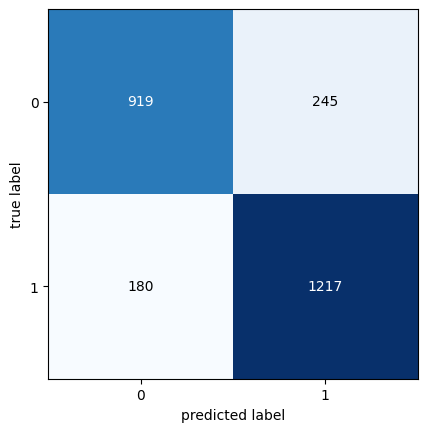

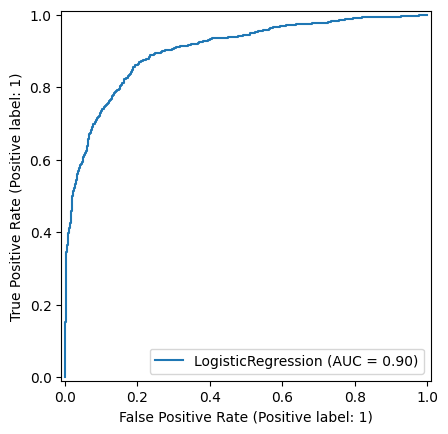

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay


scaler = StandardScaler()
x_train_sme_scaled = scaler.fit_transform(x_train_sme)
x_test_sme_scaled = scaler.transform(x_test_sme)

model = LogisticRegression()
model.fit(x_train_sme_scaled, y_train_sme)


y_pred = model.predict(x_test_sme_scaled)


accuracy = accuracy_score(y_test_sme, y_pred)
roc_auc1 = roc_auc_score(y_test_sme, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC AUC = {}".format(roc_auc1))
print(classification_report(y_test_sme, y_pred, digits=5))


plot_confusion_matrix(confusion_matrix(y_test_sme, y_pred))


RocCurveDisplay.from_estimator(model, x_test_sme_scaled, y_test_sme)


Accuracy = 0.9515814135103475
ROC Area under Curve = 0.9499593507934282
              precision    recall  f1-score   support

           0    0.96018   0.93213   0.94595      1164
           1    0.94479   0.96779   0.95615      1397

    accuracy                        0.95158      2561
   macro avg    0.95249   0.94996   0.95105      2561
weighted avg    0.95179   0.95158   0.95151      2561

**********************************************************************


NameError: name 'x_test_scaled' is not defined

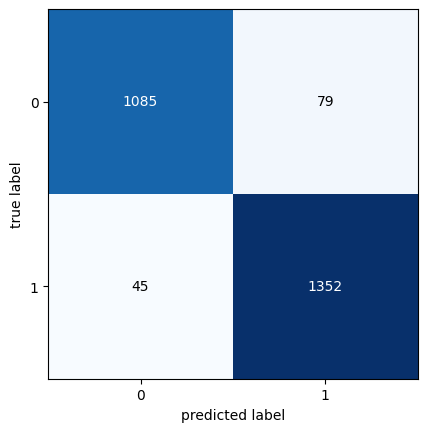

In [41]:

model=DecisionTreeClassifier()
model.fit(x_train_sme,y_train_sme)
y_pred = model.predict(x_test_sme)
accuracy = accuracy_score(y_test_sme, y_pred)
roc_auc1 = roc_auc_score(y_test_sme, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test_sme,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test_sme , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test_sme)

In [42]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_sme_scaled = scaler.fit_transform(x_train_sme)
x_test_sme_scaled = scaler.transform(x_test_sme)  # use the same scaler
model.fit(x_train_sme_scaled, y_train_sme)
y_pred = model.predict(x_test_sme_scaled)


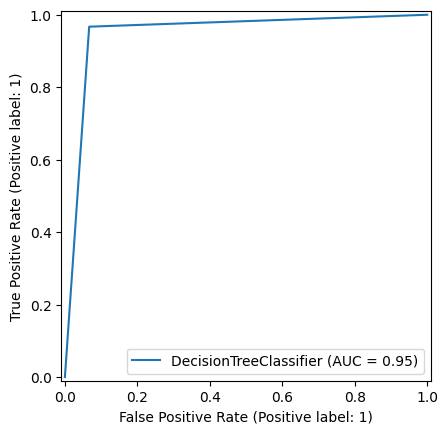

In [43]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, x_test_sme_scaled, y_test_sme)


Accuracy = 0.9515814135103475
ROC Area under Curve = 0.9496011335040477
              precision    recall  f1-score   support

           0    0.96429   0.92784   0.94571      1164
           1    0.94171   0.97137   0.95631      1397

    accuracy                        0.95158      2561
   macro avg    0.95300   0.94960   0.95101      2561
weighted avg    0.95197   0.95158   0.95149      2561

**********************************************************************


NameError: name 'x_test_scaled' is not defined

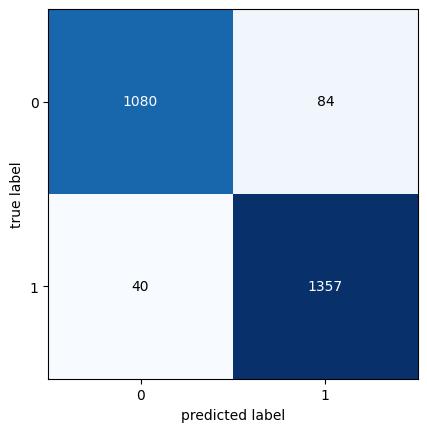

In [44]:

model=DecisionTreeClassifier()
model.fit(x_train_sme,y_train_sme)
y_pred = model.predict(x_test_sme)
accuracy = accuracy_score(y_test_sme, y_pred)
roc_auc1 = roc_auc_score(y_test_sme, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test_sme,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test_sme , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test_sme)

In [45]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train_sme)
x_test_scaled = scaler.transform(x_test_sme)


Accuracy = 0.9730573994533386
ROC AUC = 0.9706473985737724
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1164
           1       0.96      1.00      0.98      1397

    accuracy                           0.97      2561
   macro avg       0.98      0.97      0.97      2561
weighted avg       0.97      0.97      0.97      2561

**********************************************************************
[[1099   65]
 [   4 1393]]


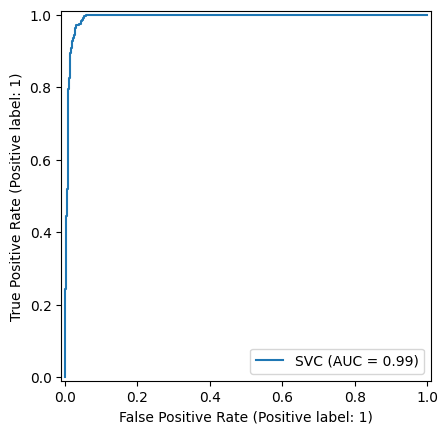

In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay


from sklearn.svm import SVC

model = SVC(probability=True, random_state=42)
model.fit(x_train_scaled, y_train_sme)
y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test_sme, y_pred)
roc_auc = roc_auc_score(y_test_sme, y_pred)

print("Accuracy =", accuracy)
print("ROC AUC =", roc_auc)
print(classification_report(y_test_sme, y_pred))
print('*' * 70)


print(confusion_matrix(y_test_sme, y_pred))


RocCurveDisplay.from_estimator(model, x_test_scaled, y_test_sme)


Accuracy = 0.9796954314720813
ROC Area under Curve = 0.9790244559401959
              precision    recall  f1-score   support

           0    0.98348   0.97165   0.97753      1164
           1    0.97661   0.98640   0.98148      1397

    accuracy                        0.97970      2561
   macro avg    0.98005   0.97902   0.97950      2561
weighted avg    0.97973   0.97970   0.97968      2561

**********************************************************************


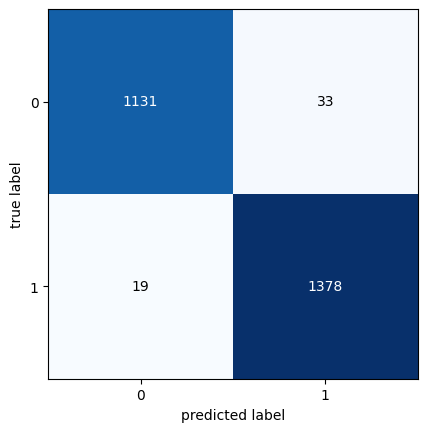

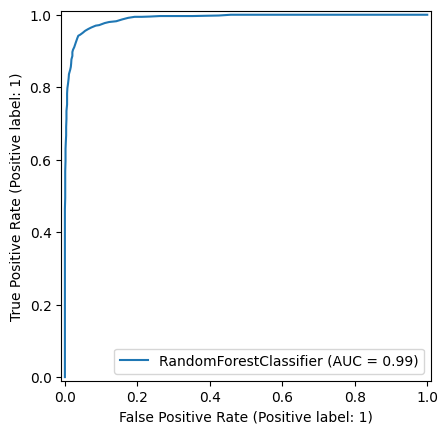

In [47]:

model=RandomForestClassifier()
model.fit(x_train_sme,y_train_sme)
y_pred = model.predict(x_test_sme)
accuracy = accuracy_score(y_test_sme, y_pred)
roc_auc1 = roc_auc_score(y_test_sme, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test_sme,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test_sme , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test_sme)


Accuracy = 0.9804763764154627
ROC Area under Curve = 0.9798119190115293
              precision    recall  f1-score   support

           0    0.98435   0.97251   0.97839      1164
           1    0.97732   0.98712   0.98219      1397

    accuracy                        0.98048      2561
   macro avg    0.98083   0.97981   0.98029      2561
weighted avg    0.98051   0.98048   0.98047      2561

**********************************************************************


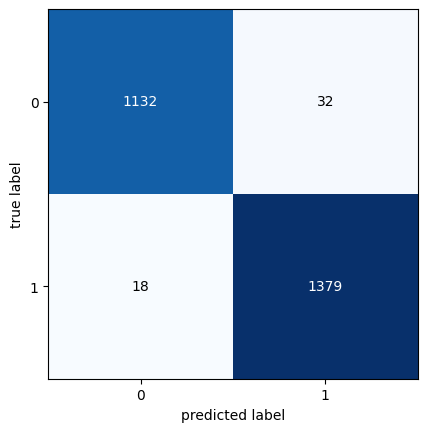

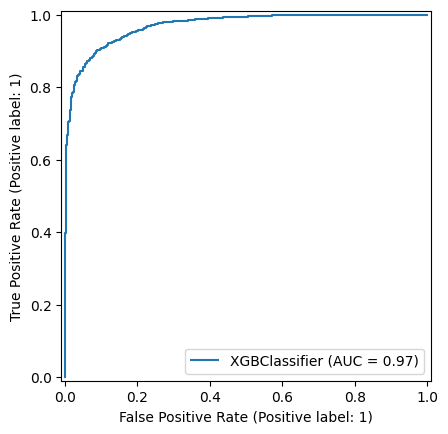

In [48]:

model=XGBClassifier()
model.fit(x_train_sme,y_train_sme)
y_pred = model.predict(x_test_sme)
accuracy = accuracy_score(y_test_sme, y_pred)
roc_auc1 = roc_auc_score(y_test_sme, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test_sme,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test_sme , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test_sme)

Accuracy = 0.8852010933229207
ROC Area under Curve = 0.8830966331879556
              precision    recall  f1-score   support

           0    0.88428   0.85997   0.87195      1164
           1    0.88593   0.90623   0.89597      1397

    accuracy                        0.88520      2561
   macro avg    0.88510   0.88310   0.88396      2561
weighted avg    0.88518   0.88520   0.88505      2561

**********************************************************************


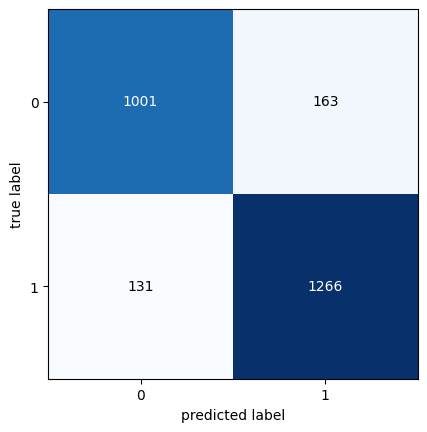

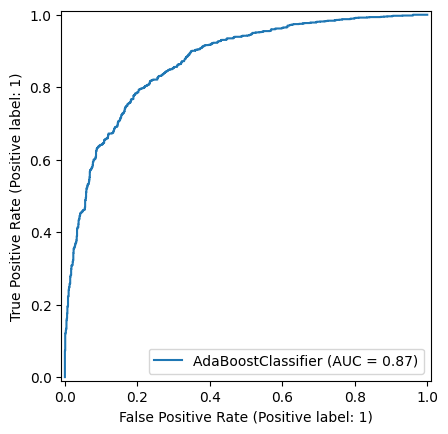

In [49]:

model=AdaBoostClassifier()
model.fit(x_train_sme,y_train_sme)
y_pred = model.predict(x_test_sme)
accuracy = accuracy_score(y_test_sme, y_pred)
roc_auc1 = roc_auc_score(y_test_sme, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test_sme,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test_sme , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test_sme)

In [50]:
models

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.804212,0.799217
Support Vector Machine,0.954067,0.936988
Decision Tree,1.000000,0.950160
Random Forest,1.000000,0.984692
XGBClassifier,1.000000,0.983624
AdaBoostClassifier,0.879902,0.872197


In [51]:
models_sme

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.827390,0.834049
Support Vector Machine,0.977398,0.972667
Decision Tree,1.000000,0.952753
Random Forest,1.000000,0.980867
XGBClassifier,1.000000,0.980476
AdaBoostClassifier,0.890507,0.885201


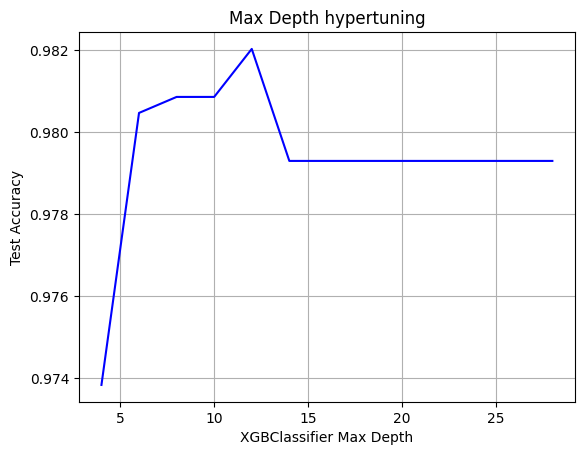

In [52]:

max_depth = []
accuracies = []
test_size = 0.3 

for i in range(4, 30, 2):
    grid = {'max_depth': i}
    clf = XGBClassifier()
    clf.set_params(**grid)

   
    clf.fit(x_train_sme, y_train_sme)

    
    accuracy = clf.score(x_test_sme, y_test_sme)

    max_depth.append(i)
    accuracies.append(accuracy)

plt.title("Max Depth hypertuning")
plt.xlabel("XGBClassifier Max Depth")
plt.ylabel("Test Accuracy")
plt.plot(max_depth, accuracies, 'b')
plt.grid()
plt.show()

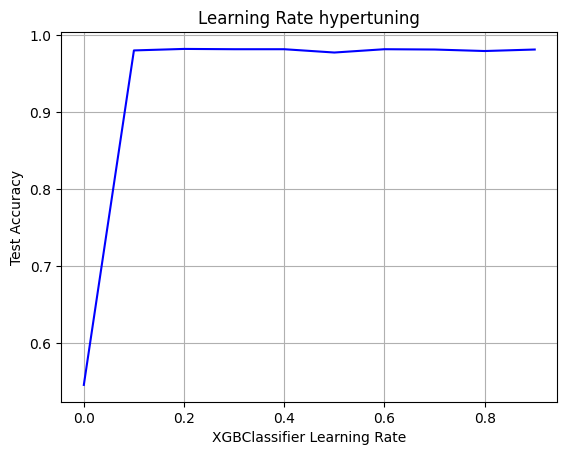

In [53]:

learning_rates = []
accuracies = []
test_size = 0.7 

for i in range(0, 10, 1):
    eta = i / 10
    grid = {'max_depth': 12, 'eta': eta}
    clf = XGBClassifier()
    clf.set_params(**grid)


    clf.fit(x_train_sme, y_train_sme)

  
    accuracy = clf.score(x_test_sme, y_test_sme)

    learning_rates.append(eta)
    accuracies.append(accuracy)

plt.title("Learning Rate hypertuning")
plt.xlabel("XGBClassifier Learning Rate")
plt.ylabel("Test Accuracy")
plt.plot(learning_rates, accuracies, 'b')
plt.grid()
plt.show()

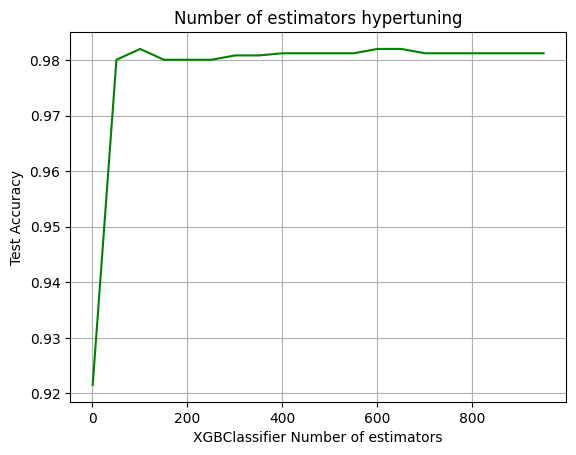

In [54]:

n_estimators = []
accuracies = []
test_size = 0.3 

for i in range(1, 1000, 50):
    grid = {'max_depth': 12, 'eta': 0.4, 'n_estimators': i}
    clf = XGBClassifier()
    clf.set_params(**grid)

   
    clf.fit(x_train_sme, y_train_sme)

    
    accuracy = clf.score(x_test_sme, y_test_sme)

    n_estimators.append(i)
    accuracies.append(accuracy)

plt.title("Number of estimators hypertuning")
plt.xlabel("XGBClassifier Number of estimators")
plt.ylabel("Test Accuracy")
plt.plot(n_estimators, accuracies, 'g')
plt.grid()
plt.show()

In [55]:
print("========================== XGBClassifier with hypertuned params ==========================")
grid = {'max_depth': 10, 'eta': 0.5, 'alpha': 0, 'lambda': 1, 'n_estimators': 300}
clf = XGBClassifier()
clf.set_params(**grid)
clf.fit(x_train_sme, y_train_sme)


accuracy = clf.score(x_test_sme, y_test_sme)
print("Test Accuracy:", accuracy)
print(classification_report(y_test_sme, clf.predict(x_test_sme)))


========================== XGBClassifier with hypertuned params ==========================
Test Accuracy: 0.9839906286606794
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1164
           1       0.98      0.99      0.99      1397

    accuracy                           0.98      2561
   macro avg       0.98      0.98      0.98      2561
weighted avg       0.98      0.98      0.98      2561



In [56]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.5-py3-none-any.whl.metadata (46 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached numba-0.62.1-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached schemdraw-0.15-py3-none-any.whl.metadata (2.2 kB)
  Using cached plotly_resampler-0.11.0-py3-none-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.905 requires matplotlib>3.7.4, but you have matplotlib 3.6.3 which is incompatible.
autoviz 0.1.905 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.
autoviz 0.1.905 requires seaborn>0.12.2, but you have seaborn 0.12.2 which is incompatible.
autoviz 0.1.905 requires xgboost<1.7,>=0.82, but you have xgboost 3.0.5 which is incom

In [57]:
print(f"PyCaret version: pPython.__version__")

PyCaret version: pPython.__version__


In [58]:
!curl https://pyenv.run 

#!/bin/bash
#
# Usage: curl https://pyenv.run | bash
#
# For more info, visit: https://github.com/pyenv/pyenv-installer
#
index_main() {
    set -e
    curl -s -S -L https://raw.githubusercontent.com/pyenv/pyenv-installer/master/bin/pyenv-installer | bash
}

index_main


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100   270  100   270    0     0    113      0  0:00:02  0:00:02 --:--:--   113


In [59]:
!pip install pycaret==3.3.2 pandas --upgrade


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 365.1 kB/s eta 0:00:28
   - -------------------------------------- 0.5/10.7 MB 365.1 kB/s eta 0:00:28
   - -------------------------------------- 0.5/10.7 MB 365.1 kB/s eta 0:00:28
   - -------------------------------------- 0.5/10.7 MB 365.1 kB/s eta 0:00:28
   - -------------------------------------- 0.5/10.7 MB 365.1 kB/s eta 0:00:28
   -- -------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviz 0.1.905 requires matplotlib>3.7.4, but you have matplotlib 3.6.3 which is incompatible.
autoviz 0.1.905 requires seaborn>0.12.2, but you have seaborn 0.12.2 which is incompatible.
autoviz 0.1.905 requires xgboost<1.7,>=0.82, but you have xgboost 3.0.5 which is incompatible.
datasets 3.6.0 requires requests>=2.32.2, but you have requests 2.28.2 which is incompatible.
datasets 3.6.0 requires tqdm>=4.66.3, but you have tqdm 4.64.1 which is incompatible.
ydata-profiling 4.1.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.1.2 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.1.4 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.11.4 which is incompatible.


In [60]:
import sys
!{sys.executable} -m pip install pycaret==3.3.2


  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [19 lines of output]
  + C:\Users\arrkr\AppData\Local\Programs\Python\Python313\python.exe C:\Users\arrkr\AppData\Local\Temp\pip-install-7nys938k\numpy_0f799e0dc2d84aa2a5a95618e49efd02\vendored-meson\meson\meson.py setup C:\Users\arrkr\AppData\Local\Temp\pip-install-7nys938k\numpy_0f799e0dc2d84aa2a5a95618e49efd02 C:\Users\arrkr\AppData\Local\Temp\pip-install-7nys938k\numpy_0f799e0dc2d84aa2a5a95618e49efd02\.mesonpy-iz_pgawm -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\arrkr\AppData\Local\Temp\pip-install-7nys938k\numpy_0f799e0dc2d84aa2a5a95618e49efd02\.mesonpy-iz_pgawm\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\arrkr\AppData\Local\Temp\pip-install-7nys938k\numpy_0f799e0dc2d84aa2a5a95618e49efd02
  Build dir: C:\Users\arrkr\AppData\Local\Temp\pip-install-7nys938k\numpy_0f799e0dc2d84

In [61]:
import sys
print(sys.executable)
print(sys.version)
!pip show pycaret


C:\Users\arrkr\AppData\Local\Programs\Python\Python313\python.exe
3.13.4 (tags/v3.13.4:8a526ec, Jun  3 2025, 17:46:04) [MSC v.1943 64 bit (AMD64)]
Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: c:\users\arrkr\appdata\roaming\python\python310\site-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, xxhash, yellowbrick
Required-by: 


In [64]:
!pip install numpy==1.26.4 --only-binary=:all:


Defaulting to user installation because normal site-packages is not writeable


In [65]:
!pip install --upgrade pip
!pip install pycaret==3.3.2


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [67]:
!{sys.executable} -m pip install pycaret==3.3.2


  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [19 lines of output]
  + C:\Users\arrkr\AppData\Local\Programs\Python\Python313\python.exe C:\Users\arrkr\AppData\Local\Temp\pip-install-1s9bo54p\numpy_a66731c68f5d4e8eb5e84d73a4cfe28e\vendored-meson\meson\meson.py setup C:\Users\arrkr\AppData\Local\Temp\pip-install-1s9bo54p\numpy_a66731c68f5d4e8eb5e84d73a4cfe28e C:\Users\arrkr\AppData\Local\Temp\pip-install-1s9bo54p\numpy_a66731c68f5d4e8eb5e84d73a4cfe28e\.mesonpy-0dp5ctxl -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\arrkr\AppData\Local\Temp\pip-install-1s9bo54p\numpy_a66731c68f5d4e8eb5e84d73a4cfe28e\.mesonpy-0dp5ctxl\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\arrkr\AppData\Local\Temp\pip-install-1s9bo54p\numpy_a66731c68f5d4e8eb5e84d73a4cfe28e
  Build dir: C:\Users\arrkr\AppData\Local\Temp\pip-install-1s9bo54p\numpy_a66731c68f5d4

In [66]:
from pycaret.classification import setup
print("PyCaret imported successfully ")


ModuleNotFoundError: No module named 'pycaret'

In [ ]:
import sys
print(sys.executable)


In [ ]:
!C:\Users\arrkr\py310_env\Scripts\python.exe -m pip install pycaret==3.3.2


In [69]:
x_train_sme.shape

(5973, 19)

In [70]:
def ANN(X_train,X_test,y_train,y_test,loss,weights, optimizer):
    model=keras.Sequential([
    keras.layers.Dense(26,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
    print(model.evaluate(X_test,y_test))
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print("Classification_report: ",classification_report(y_test,y_pred))
    return y_pred

In [71]:
import keras

y_pred=ANN(x_train_sme,x_test_sme,y_train_sme,y_test_sme,'binary_crossentropy',-1, optimizer='adam')

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6576 - loss: 0.6129    
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8172 - loss: 0.3982 
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8481 - loss: 0.3497 
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.3126 
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.2935 
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.2829 
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: 0.2491 
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9184 - loss: 0.2227 
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9259 - loss: 0.2063 
Epoch 10/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9336 - loss: 0.1917 
Epoch 11/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9369 - loss: 0.1890 
Epoch 12/100
187/187 ━━━━━━

In [72]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable


In [73]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# It's good practice to set a seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# --- 1. Define the model-building function for KerasClassifier ---
# This function defines the architecture and must not have any training logic (like .fit or .compile).
# The parameters it takes (like units_layer1) will be set by GridSearchCV.
def create_model(units_layer1=26, units_layer2=15, optimizer='adam', loss='binary_crossentropy'):
    """
    Builds and returns a Keras Sequential model.

    Args:
        units_layer1 (int): Number of units for the first dense layer.
        units_layer2 (int): Number of units for the second dense layer.
        optimizer (str): Name of the optimizer to use.
        loss (str): Name of the loss function to use.
    """
    # Determine the input shape from the training data
    input_shape = (x_train_sme.shape[1],)

    model = keras.Sequential([
        keras.layers.Dense(units_layer1, activation='tanh', input_shape=input_shape),
        keras.layers.Dense(units_layer2, activation='tanh'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # The .compile() step is necessary inside this function
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

# Define class weights
weights = {0:1,1:1}

# --- 2. Wrap the Keras model in a KerasClassifier ---
# This wrapper makes the Keras model compatible with scikit-learn's GridSearchCV.
# We pass the model-building function to the `build_fn` argument.
model = KerasClassifier(
    build_fn=create_model,
    epochs=100,
    batch_size=32,
    verbose=0, # Set to 1 to see training progress for each model in the grid search
    class_weight=weights # Pass class weights directly to the wrapper
)

# --- 3. Define the grid of hyperparameters to search ---
# 'model__' prefix is required for parameters that get passed to the model-building function.
param_grid = {
    'model__optimizer': ['adam', 'rmsprop', 'nadam', 'adamw'],
    'model__loss': ['binary_crossentropy'],
    'model__units_layer1': [32, 64],
    'model__units_layer2': [16, 8]
}

# --- 4. Create and run the GridSearchCV object ---
print("Starting grid search...")
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1 # Use all available CPU cores for faster search
)

# Fit the grid search to the data
grid_search_result = grid_search.fit(x_train_sme, y_train_sme)

# --- 5. Print the results ---
print("\nGrid search complete!")
print(f"Best Score: {grid_search_result.best_score_:.4f}")
print("Best Parameters: ", grid_search_result.best_params_)

# --- 6. Evaluate the best model on the test data ---
best_model = grid_search_result.best_estimator_
y_pred_proba = best_model.predict(x_test_sme)
y_pred = np.round(y_pred_proba)

print("\n--- Evaluation of the Best Model ---")
print(f"Test Accuracy: {best_model.score(x_test_sme, y_test_sme):.4f}")
print("Classification Report:")
print(classification_report(y_test_sme, y_pred))

Starting grid search...

Grid search complete!
Best Score: 0.9779
Best Parameters:  {'model__loss': 'binary_crossentropy', 'model__optimizer': 'adam', 'model__units_layer1': 64, 'model__units_layer2': 16}

--- Evaluation of the Best Model ---
Test Accuracy: 0.9902
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1164
           1       0.99      1.00      0.99      1397

    accuracy                           0.99      2561
   macro avg       0.99      0.99      0.99      2561
weighted avg       0.99      0.99      0.99      2561



In [75]:
def build_best_model():
    """
    Builds and compiles the Keras model with the best hyperparameters from the grid search.
    Best Parameters: {'model__loss': 'binary_crossentropy', 'model__optimizer': 'nadam', 'model__units_layer1': 64, 'model__units_layer2': 8}
    """
    # Determine the input shape from the training data
    input_shape = (x_train_sme.shape[1],)

    model = keras.Sequential([
        keras.layers.Dense(64, activation='tanh', input_shape=input_shape),
        keras.layers.Dense(8, activation='tanh'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # The .compile() step is necessary inside this function
    model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [76]:
# Build the model with the best parameters
best_model = build_best_model()

In [77]:
# Fit the model to the scaled training data
print("Training the best model...")
best_model.fit(x_train_sme, y_train_sme, epochs=100, batch_size=32, verbose=0)
print("Model training complete.")

Training the best model...
Model training complete.


In [79]:
# --- 3. Prepare a Prediction Function for LIME ---
# LIME requires a function that takes a numpy array of data and returns a numpy array
# of prediction probabilities for each class (e.g., [[prob_class_0, prob_class_1]]).
def predict_proba_for_lime(data):
    """
    A wrapper function to make predictions compatible with LIME.
    It returns probabilities for both classes (0 and 1) for a binary classification model.
    """
    preds = best_model.predict(data)
    # Stack the probabilities for class 0 (1-preds) and class 1 (preds).
    return np.hstack([1 - preds, preds])

In [80]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.8 MB 2.8 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/12.8 MB 1.9 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/12.8 MB 1.9 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/12.8 MB 1.7 MB/s eta 0:00:07
   ----- ---------------------------------- 1.8/12.8 MB 1.7 MB/s eta 0:00:07
   ------ --------------------------------- 2.1/12.8 MB 1.6 MB/s eta 0:00:07
   ------- -------------------------------- 2.4/12.8 MB 1.6 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/12.8 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 2.9/12.8 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 3.1/12.8 MB 1

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [82]:
!pip install lime --no-warn-script-location


Defaulting to user installation because normal site-packages is not writeable


In [84]:
!{sys.executable} -m pip install lime --use-pep517


  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 2.5 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/12.9 MB 2.6 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.9 MB 2.9 MB/s eta 0:00:04
   -------- ------------------------------- 2.6/12.9 MB 3.1 M

In [85]:
import lime
import lime.lime_tabular

In [86]:
# --- 4. Create the LIME Explainer ---
# The explainer needs to know about your training data and feature/class names.
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train_sme.values,
    feature_names=x_train_sme.columns.tolist(),
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

In [ ]:
# --- 5. Explain a Single Prediction ---
# Let's pick a random instance from the test set to explain.
instance_to_explain_idx = np.random.randint(0, len(x_test_sme))
instance_to_explain = x_test_sme.iloc[instance_to_explain_idx].values # Get values as numpy array for LIME
true_label = y_test_sme.iloc[instance_to_explain_idx] # Get true label

print(f"\n--- Explaining a Prediction for Test Instance {instance_to_explain_idx} ---")
print(f"True Class: {true_label}")
print(f"Predicted Class: {np.argmax(predict_proba_for_lime(np.expand_dims(instance_to_explain, axis=0)))}")

# Generate the explanation. The `num_features` argument specifies how many of the
# most important features you want to see.
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=predict_proba_for_lime,
    num_features=5
)